In [1]:
import gdown
url = 'https://drive.google.com/drive/folders/1renqW__S1-CYF1aZTZsdJpajKay34XgQ?usp=sharing'
gdown.download(url, 'BasicFinalDatabase', quiet=False)

g:\ML\Alexnet with basic character\venv\Lib\site-packages\gdown\parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1renqW__S1-CYF1aZTZsdJpajKay34XgQ?usp=sharing
To: g:\ML\Alexnet with basic character\BasicFinalDatabase
1.24MB [00:02, 424kB/s]


'BasicFinalDatabase'

In [20]:
%pip install matplotlib

     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     ---------------------- ---------------- 61.4/104.6 kB 3.2 MB/s eta 0:00:01
     ---------------------- ---------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install optuna

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import optuna
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from keras_tuner.tuners import RandomSearch

In [3]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

PyTorch version: 2.6.0+cu126
CUDA available: True
GPU Name: NVIDIA GeForce RTX 4060 Ti


# Bengali Character Mapping

In [4]:
bengali_char_map = {
    0: "অ", 1: "আ", 2: "ই", 3: "ঈ", 4: "উ", 5: "ঊ", 6: "ঋ", 7: "এ", 8: "ঐ", 9: "ও", 10: "ঔ",
    11: "ক", 12: "খ", 13: "গ", 14: "ঘ", 15: "ঙ", 16: "চ", 17: "ছ", 18: "জ", 19: "ঝ", 20: "ঞ",
    21: "ট", 22: "ঠ", 23: "ড", 24: "ঢ", 25: "ণ", 26: "ত", 27: "থ", 28: "দ", 29: "ধ", 30: "ন",
    31: "প", 32: "ফ", 33: "ব", 34: "ভ", 35: "ম", 36: "য", 37: "র", 38: "ল", 39: "শ", 40: "ষ",
    41: "স", 42: "হ", 43: "ড়", 44: "ঢ়", 45: "য়", 46: "ৎ", 47: "ং", 48: "ঃ", 49: "ঁ"
}


# Image Preprocessing Function

In [45]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}")
        return None
    image = cv2.resize(image, (224,224))  # Resize to a fixed size
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add channel dimension
    return image

# Dataset Loading Function

In [46]:
def load_dataset(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    valid_extensions = ('.bmp', '.png', '.jpg', '.jpeg')  # Add other valid extensions if needed
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            if image_name.lower().endswith(valid_extensions):
                image_path = os.path.join(class_path, image_name)
                image = load_and_preprocess_image(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32), class_names


In [47]:
# Dataset paths
train_dataset_path = 'BasicFinalDatabase/BasicFinalDatabase/Train'
test_dataset_path = 'BasicFinalDatabase/BasicFinalDatabase/Test'

train_images, train_labels, train_class_names = load_dataset(train_dataset_path)
test_images, test_labels, test_class_names = load_dataset(test_dataset_path)

In [48]:
# Split train data into train and validation sets
train_images1, X_vali, train_labels1, y_vali = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)
train_images1 = torch.tensor(train_images1).float()
train_labels1 = torch.tensor(train_labels1).long()
X_vali = torch.tensor(X_vali).float()
y_vali = torch.tensor(y_vali).long()
test_images = torch.tensor(test_images).float()
test_labels = torch.tensor(test_labels).long()

# Create DataLoaders
train_dataset = TensorDataset(train_images1, train_labels1)
val_dataset = TensorDataset(X_vali, y_vali)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
class Inception(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()
        self.branch1 = nn.Conv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3red, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5red, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(ch5x5red, ch5x5, kernel_size=5, padding=2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = F.relu(self.branch1(x))
        branch2 = F.relu(self.branch2(x))
        branch3 = F.relu(self.branch3(x))
        branch4 = F.relu(self.branch4(x))
        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

class GoogLeNetAuxClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(GoogLeNetAuxClassifier, self).__init__()
        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.conv = nn.Conv2d(in_channels, 128, kernel_size=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.dropout = nn.Dropout(0.7)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.avgpool(x)
        x = F.relu(self.conv(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class GoogLeNetWithAux(nn.Module):
    def __init__(self, num_classes):
        super(GoogLeNetWithAux, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=1)
        self.conv3 = nn.Conv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.aux1 = GoogLeNetAuxClassifier(512, num_classes)

        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.aux2 = GoogLeNetAuxClassifier(528, num_classes)

        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.linear = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        aux1_out = self.aux1(x) if self.training else None  # Only use during training

        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        aux2_out = self.aux2(x) if self.training else None  # Only use during training

        x = self.inception4e(x)
        x = self.maxpool4(x)

        x = self.inception5a(x)
        x = self.inception5b(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        final_out = self.linear(x)

        return final_out, aux1_out, aux2_out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GoogLeNetWithAux(num_classes=50).to(device)
model.train()

x = torch.randn(2, 1, 224, 224).to(device)

final_out, aux1, aux2 = model(x)
print("Main output:", final_out.shape)
print("Aux1 output:", aux1.shape)
print("Aux2 output:", aux2.shape)


Main output: torch.Size([2, 50])
Aux1 output: torch.Size([2, 50])
Aux2 output: torch.Size([2, 50])


In [50]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='val_loss', mode='min'):
        """
        Args:
            patience (int): Epochs to wait after last improvement.
            verbose (bool): If True, prints messages.
            delta (float): Minimum change to qualify as improvement.
            monitor (str): Metric to monitor ('val_loss' or 'val_accuracy').
            mode (str): 'min' (minimize) or 'max' (maximize).
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.monitor = monitor
        self.mode = mode
        self.counter = 0
        self.best_metric = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, metric, model):
        if self.best_metric is None:
            self.best_metric = metric
            self.best_model_state = model.state_dict()
        elif self.mode == 'min' and metric > self.best_metric - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        elif self.mode == 'max' and metric < self.best_metric + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_metric = metric
            self.best_model_state = model.state_dict()
            self.counter = 0
            if self.verbose:
                print(f'{self.monitor} improved to {metric:.4f}, saving model')

In [51]:
from torchinfo import summary

# Print model summary
summary(model, input_size=(2, 1, 224, 224))


Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNetWithAux                         [2, 50]                   4,432,228
├─Conv2d: 1-1                            [2, 64, 112, 112]         3,200
├─MaxPool2d: 1-2                         [2, 64, 56, 56]           --
├─Conv2d: 1-3                            [2, 64, 56, 56]           4,160
├─Conv2d: 1-4                            [2, 192, 56, 56]          110,784
├─MaxPool2d: 1-5                         [2, 192, 28, 28]          --
├─Inception: 1-6                         [2, 256, 28, 28]          --
│    └─Conv2d: 2-1                       [2, 64, 28, 28]           12,352
│    └─Sequential: 2-2                   [2, 128, 28, 28]          --
│    │    └─Conv2d: 3-1                  [2, 96, 28, 28]           18,528
│    │    └─ReLU: 3-2                    [2, 96, 28, 28]           --
│    │    └─Conv2d: 3-3                  [2, 128, 28, 28]          110,720
│    └─Sequential: 2-3                   [2, 32, 28, 2

In [52]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


Image shape: torch.Size([32, 1, 224, 224])


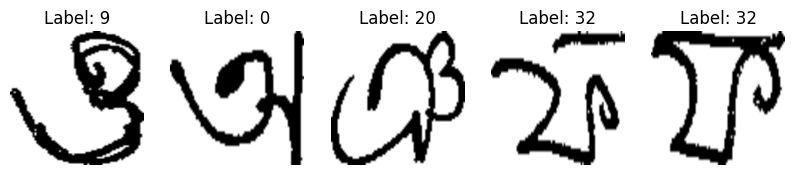

In [53]:
import matplotlib.pyplot as plt
for images, labels in train_loader:
    print("Image shape:", images.shape)
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()
    break

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=15, verbose=True, mode=min,monitor='val_accuracy',delta=0.001)


epochs = 50
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for images, labels in train_loader:
        labels = labels.long()
        print(f'Before shifting: {labels.min()} {labels.max()}')
        print(f'After shifting: {labels.min()} {labels.max()}')

        if (labels < 0).any() or (labels >= 50).any():
            print("ERROR: Some labels are out of bounds!")
            print(labels[labels < 0])
            print(labels[labels >= 50])
            break

        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, aux1, aux2 = model(images)
        print("Output shape:", outputs.shape)

        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux1, labels) if aux1 is not None else 0
        loss3 = criterion(aux2, labels) if aux2 is not None else 0
        loss = loss1 + 0.3 * (loss2 + loss3)

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels = labels.long()
            print(f'Before shifting: {labels.min()} {labels.max()}')
            print(f'After shifting: {labels.min()} {labels.max()}')

            if (labels < 0).any() or (labels >= 50).any():
                print("ERROR: Some labels are out of bounds!")
                print(labels[labels < 0])
                print(labels[labels >= 50])
                break

            images, labels = images.to(device), labels.to(device)
            outputs, aux1, aux2 = model(images)

            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux1, labels) if aux1 is not None else 0
            loss3 = criterion(aux2, labels) if aux2 is not None else 0
            loss = loss1 + 0.3 * (loss2 + loss3)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
        val_accuracy = correct_val / total_val
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        val_loss /= len(val_loader)
        print(f'Epoch {epoch+1} \t Validation Loss: {val_loss:.4f}')

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping!")
            break

# Load best model
model.load_state_dict(early_stopping.best_model_state)

Before shifting: 0 49
After shifting: 0 49
Output shape: torch.Size([32, 50])
Before shifting: 0 48
After shifting: 0 48
Output shape: torch.Size([32, 50])
Before shifting: 0 45
After shifting: 0 45
Output shape: torch.Size([32, 50])
Before shifting: 1 47
After shifting: 1 47
Output shape: torch.Size([32, 50])
Before shifting: 0 48
After shifting: 0 48
Output shape: torch.Size([32, 50])
Before shifting: 0 48
After shifting: 0 48
Output shape: torch.Size([32, 50])
Before shifting: 0 49
After shifting: 0 49
Output shape: torch.Size([32, 50])
Before shifting: 0 47
After shifting: 0 47
Output shape: torch.Size([32, 50])
Before shifting: 2 48
After shifting: 2 48
Output shape: torch.Size([32, 50])
Before shifting: 0 47
After shifting: 0 47
Output shape: torch.Size([32, 50])
Before shifting: 0 49
After shifting: 0 49
Output shape: torch.Size([32, 50])
Before shifting: 0 46
After shifting: 0 46
Output shape: torch.Size([32, 50])
Before shifting: 0 49
After shifting: 0 49
Output shape: torch.S

<All keys matched successfully>

In [55]:
from collections import Counter
train_labels = []
for _, labels in train_loader:
    train_labels.extend(labels.numpy())
val_labels = []
for _, labels in val_loader:
    val_labels.extend(labels.numpy())
print("Training label distribution:", Counter(train_labels))
print("Validation label distribution:", Counter(val_labels))

Training label distribution: Counter({np.int64(36): 225, np.int64(25): 224, np.int64(18): 223, np.int64(47): 223, np.int64(2): 222, np.int64(24): 221, np.int64(26): 221, np.int64(48): 220, np.int64(27): 219, np.int64(4): 219, np.int64(7): 219, np.int64(3): 219, np.int64(35): 219, np.int64(13): 219, np.int64(11): 219, np.int64(14): 218, np.int64(37): 218, np.int64(33): 218, np.int64(40): 217, np.int64(6): 217, np.int64(39): 217, np.int64(41): 216, np.int64(38): 216, np.int64(15): 216, np.int64(30): 216, np.int64(45): 216, np.int64(43): 216, np.int64(34): 216, np.int64(23): 215, np.int64(46): 215, np.int64(17): 215, np.int64(10): 215, np.int64(8): 215, np.int64(29): 215, np.int64(1): 215, np.int64(44): 215, np.int64(22): 214, np.int64(42): 214, np.int64(19): 214, np.int64(0): 213, np.int64(21): 213, np.int64(5): 212, np.int64(9): 212, np.int64(28): 212, np.int64(20): 211, np.int64(31): 210, np.int64(49): 209, np.int64(16): 207, np.int64(32): 207, np.int64(12): 203})
Validation label dist

# Hyper Parameter Tuning

[I 2025-04-26 14:44:28,665] A new study created in memory with name: no-name-8cde5211-8a82-436e-a6b9-8f8ef73734bd
[I 2025-04-26 14:46:42,599] Trial 0 finished with value: 0.0125 and parameters: {'learning_rate': 0.00310831278357372, 'batch_size': 32, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.0125.
[I 2025-04-26 14:50:25,011] Trial 1 finished with value: 0.9341666666666667 and parameters: {'learning_rate': 0.0002485026534084614, 'batch_size': 32, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.9341666666666667.
[I 2025-04-26 14:54:09,570] Trial 2 finished with value: 0.9241666666666667 and parameters: {'learning_rate': 0.00027941104015350083, 'batch_size': 64, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.9341666666666667.
[I 2025-04-26 14:56:20,678] Trial 3 finished with value: 0.015833333333333335 and parameters: {'learning_rate': 0.0030346298583965267, 'batch_size': 16, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.9341666666666667.
[I 2025-04-26 14:58:29,813

Best hyperparameters: {'learning_rate': 0.00015803240635182343, 'batch_size': 16, 'optimizer': 'Adam'}
Best validation accuracy: 0.9383333333333334
Epoch 1 	 Train Loss: 6.1591 	 Train Accuracy: 0.0319 	 Val Loss: 3.6885 	 Val Accuracy: 0.0475
Epoch 2 	 Train Loss: 4.9924 	 Train Accuracy: 0.1211 	 Val Loss: 2.4356 	 Val Accuracy: 0.2858
val_loss improved to 2.4356, saving model
Epoch 3 	 Train Loss: 2.8938 	 Train Accuracy: 0.4931 	 Val Loss: 0.9829 	 Val Accuracy: 0.7092
val_loss improved to 0.9829, saving model
Epoch 4 	 Train Loss: 1.8385 	 Train Accuracy: 0.7067 	 Val Loss: 0.6230 	 Val Accuracy: 0.7908
val_loss improved to 0.6230, saving model
Epoch 5 	 Train Loss: 1.3543 	 Train Accuracy: 0.7987 	 Val Loss: 0.4381 	 Val Accuracy: 0.8592
val_loss improved to 0.4381, saving model
Epoch 6 	 Train Loss: 1.0504 	 Train Accuracy: 0.8530 	 Val Loss: 0.4332 	 Val Accuracy: 0.8675
val_loss improved to 0.4332, saving model
Epoch 7 	 Train Loss: 0.8440 	 Train Accuracy: 0.8850 	 Val Loss: 

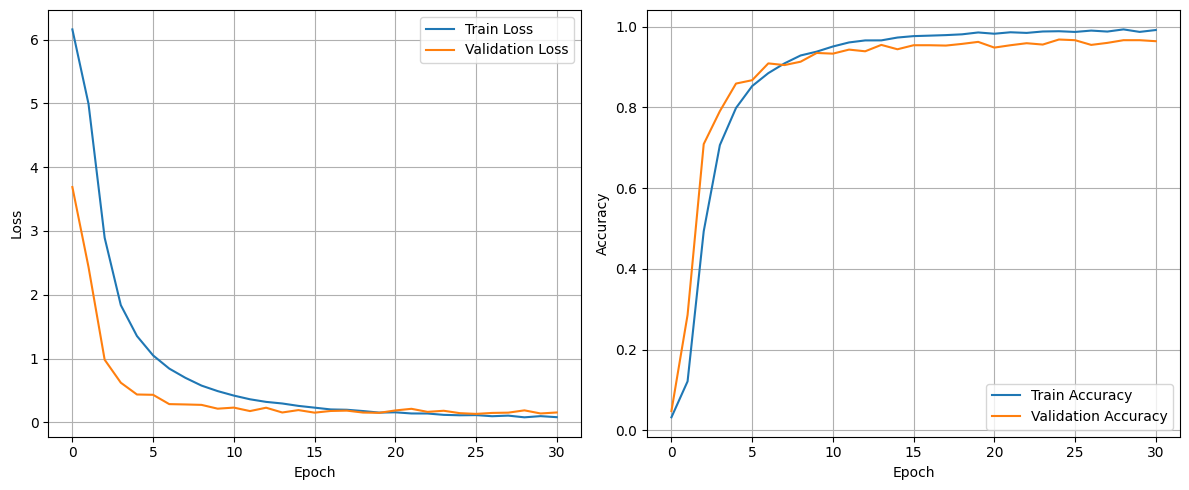

In [ ]:
num_classes = len(bengali_char_map)

def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD"])

    # Create DataLoaders with the suggested batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GoogLeNetWithAux(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    patience = 5
    best_val_loss = float("inf")
    counter = 0
    best_model_state = None

    epochs = 10
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, aux1, aux2 = model(images)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux1, labels) if aux1 is not None else torch.tensor(0.0, device=device)
            loss3 = criterion(aux2, labels) if aux2 is not None else torch.tensor(0.0, device=device)
            loss = loss1 + 0.3 * (loss2 + loss3)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0
        val_preds = []
        val_true = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs, aux1, aux2 = model(images)
                loss1 = criterion(outputs, labels)
                loss2 = criterion(aux1, labels) if aux1 is not None else torch.tensor(0.0, device=device)
                loss3 = criterion(aux2, labels) if aux2 is not None else torch.tensor(0.0, device=device)
                loss = loss1 + 0.3 * (loss2 + loss3)
                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(val_true, val_preds)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break

    model.load_state_dict(best_model_state)

    return val_accuracy

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best validation accuracy:", study.best_value)

best_params = study.best_params
final_batch_size = best_params["batch_size"]
final_learning_rate = best_params["learning_rate"]
final_optimizer_name = best_params["optimizer"]

# Create final DataLoaders
train_loader = DataLoader(train_dataset, batch_size=final_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=final_batch_size)

# Initialize the final model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
final_model = GoogLeNetWithAux(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()

if final_optimizer_name == "Adam":
    optimizer = optim.Adam(final_model.parameters(), lr=final_learning_rate)
else:
    optimizer = optim.SGD(final_model.parameters(), lr=final_learning_rate, momentum=0.9)

early_stopping = EarlyStopping(patience=5, verbose=True)
epochs = 50
history = {"train_loss": [], "val_loss": [], "train_accuracy": [], "val_accuracy": []}

for epoch in range(epochs):
    final_model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, aux1, aux2 = final_model(images)
        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux1, labels) if aux1 is not None else torch.tensor(0.0, device=device)
        loss3 = criterion(aux2, labels) if aux2 is not None else torch.tensor(0.0, device=device)
        loss = loss1 + 0.3 * (loss2 + loss3)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = train_correct / train_total
    history["train_loss"].append(train_loss / len(train_loader))
    history["train_accuracy"].append(train_accuracy)

    # Validation phase
    final_model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs, aux1, aux2 = final_model(images)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux1, labels) if aux1 is not None else torch.tensor(0.0, device=device)
            loss3 = criterion(aux2, labels) if aux2 is not None else torch.tensor(0.0, device=device)
            loss = loss1 + 0.3 * (loss2 + loss3)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    history["val_loss"].append(val_loss)
    history["val_accuracy"].append(val_accuracy)

    print(f"Epoch {epoch+1} \t Train Loss: {history['train_loss'][-1]:.4f} \t Train Accuracy: {train_accuracy:.4f} \t Val Loss: {val_loss:.4f} \t Val Accuracy: {val_accuracy:.4f}")

    # Early stopping
    early_stopping(val_loss, final_model)
    if early_stopping.early_stop:
        print("Early stopping!")
        break

# Load the best model state
final_model.load_state_dict(early_stopping.best_model_state)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history["train_accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [36]:
# class TunedGoogLeNetWithAux(GoogLeNetWithAux):
#     def __init__(self, num_classes, filter_scale, dropout_main, dropout_aux):
#         super(TunedGoogLeNetWithAux, self).__init__(num_classes)
#         self.inception3a = Inception(192, int(64*filter_scale), int(96*filter_scale), int(128*filter_scale), int(16*filter_scale), int(32*filter_scale), int(32*filter_scale))
#         self.inception3b = Inception(int(256*filter_scale), int(128*filter_scale), int(128*filter_scale), int(192*filter_scale), int(32*filter_scale), int(96*filter_scale), int(64*filter_scale))
#         self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)
#         self.inception4a = Inception(int(480*filter_scale), int(192*filter_scale), int(96*filter_scale), int(208*filter_scale), int(16*filter_scale), int(48*filter_scale), int(64*filter_scale))
#         self.aux1 = GoogLeNetAuxClassifier(int(512*filter_scale), num_classes)
#         self.inception4b = Inception(int(512*filter_scale), int(160*filter_scale), int(112*filter_scale), int(224*filter_scale), int(24*filter_scale), int(64*filter_scale), int(64*filter_scale))
#         self.inception4c = Inception(int(512*filter_scale), int(128*filter_scale), int(128*filter_scale), int(256*filter_scale), int(24*filter_scale), int(64*filter_scale), int(64*filter_scale))
#         self.inception4d = Inception(int(512*filter_scale), int(112*filter_scale), int(144*filter_scale), int(288*filter_scale), int(32*filter_scale), int(64*filter_scale), int(64*filter_scale))
#         self.aux2 = GoogLeNetAuxClassifier(int(528*filter_scale), num_classes)
#         self.inception4e = Inception(int(528*filter_scale), int(256*filter_scale), int(160*filter_scale), int(320*filter_scale), int(32*filter_scale), int(128*filter_scale), int(128*filter_scale))
#         self.maxpool4 = nn.MaxPool2d(2, stride=2)
#         self.inception5a = Inception(int(832*filter_scale), int(256*filter_scale), int(160*filter_scale), int(320*filter_scale), int(32*filter_scale), int(128*filter_scale), int(128*filter_scale))
#         self.inception5b = Inception(int(832*filter_scale), int(384*filter_scale), int(192*filter_scale), int(384*filter_scale), int(48*filter_scale), int(128*filter_scale), int(128*filter_scale))
#         self.dropout = nn.Dropout(dropout_main)
#         self.aux1.dropout = nn.Dropout(dropout_aux)
#         self.aux2.dropout = nn.Dropout(dropout_aux)